In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import accuracy_score

In [30]:
df=pd.read_csv(r"C:\Users\sai kumar\Downloads\archive (2)\riceClassification.csv")

In [31]:
df.head(20)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
5,6,2990,77.417073,50.954344,0.752861,3080,61.700780,0.584898,216.930,0.798439,1.519342,1
6,7,3556,84.323564,55.413061,0.753762,3636,67.287739,0.750211,227.007,0.867148,1.521727,1
7,8,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487,1
8,9,2629,74.133114,48.074144,0.761228,2790,57.856260,0.640595,207.325,0.768594,1.542058,1
9,10,5719,106.721142,68.977700,0.763053,5819,85.332625,0.754983,281.839,0.904748,1.547183,1


In [32]:
df.tail(20)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18165,18166,6333,148.374768,54.586551,0.929867,6447,89.796581,0.592645,335.001,0.709132,2.718156,0
18166,18167,6438,150.282934,55.022597,0.930565,6662,90.537927,0.571809,339.988,0.699896,2.731295,0
18167,18168,7097,157.365971,57.605636,0.930591,7214,95.058829,0.675905,352.896,0.716129,2.731781,0
18168,18169,6427,150.538078,55.089492,0.930634,6660,90.460547,0.490985,357.034,0.633576,2.732610,0
18169,18170,7482,162.103111,59.270005,0.930760,7647,97.603167,0.543158,368.091,0.693932,2.734994,0
18170,18171,5974,145.104999,53.016558,0.930864,6155,87.214294,0.535689,336.565,0.662731,2.736975,0
18171,18172,6952,156.552172,56.941367,0.931508,7177,94.082737,0.518806,352.403,0.703462,2.749357,0
18172,18173,7408,161.974627,58.826972,0.931717,7644,97.119301,0.594352,370.033,0.679876,2.753408,0
18173,18174,7229,160.482928,57.917628,0.932606,7439,95.938776,0.629923,362.126,0.692737,2.770882,0
18174,18175,6447,153.650034,54.709864,0.934460,6637,90.601188,0.782783,343.764,0.685562,2.808452,0


In [33]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [34]:
df.Class.unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
id                 18185 non-null int64
Area               18185 non-null int64
MajorAxisLength    18185 non-null float64
MinorAxisLength    18185 non-null float64
Eccentricity       18185 non-null float64
ConvexArea         18185 non-null int64
EquivDiameter      18185 non-null float64
Extent             18185 non-null float64
Perimeter          18185 non-null float64
Roundness          18185 non-null float64
AspectRation       18185 non-null float64
Class              18185 non-null int64
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [36]:
df.corr()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
id,1.000000,0.709155,0.464022,0.637148,-0.347816,0.707600,0.706333,0.149924,0.628830,0.430033,-0.382648,-0.808591
Area,0.709155,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.464022,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.637148,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.347816,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.707600,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.706333,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.149924,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.628830,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.430033,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759


In [37]:
data=df.drop(columns=["MajorAxisLength","Extent","Perimeter"])

In [38]:
data.head()

,id,Area,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Roundness,AspectRation,Class
0,1,4537,64.012769,0.719916,4677,76.004525,0.764510,1.440796,1
1,2,2872,51.400454,0.725553,3015,60.471018,0.831658,1.453137,1
2,3,3048,52.043491,0.731211,3132,62.296341,0.868434,1.465950,1
3,4,3073,51.928487,0.738639,3157,62.551300,0.870203,1.483456,1
4,5,3693,56.374021,0.749282,3802,68.571668,0.874743,1.510000,1


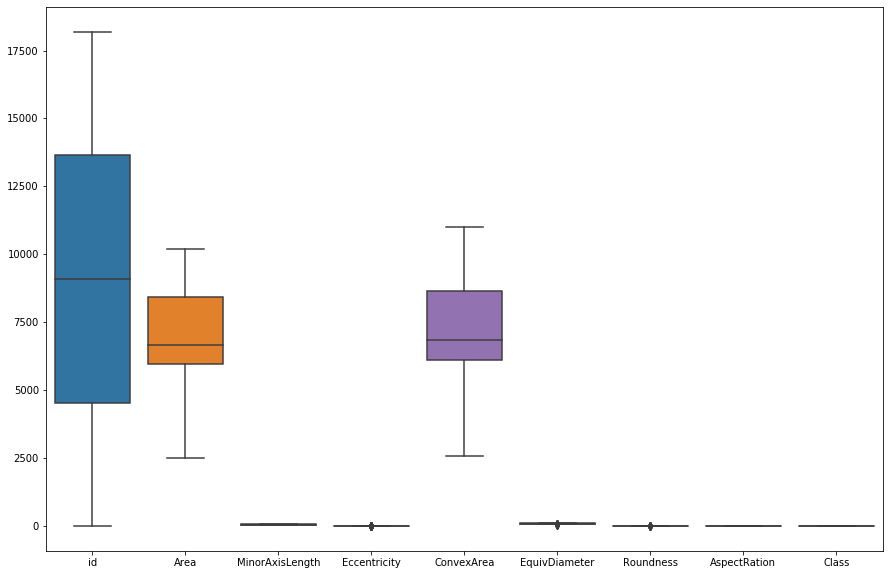

In [39]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax)

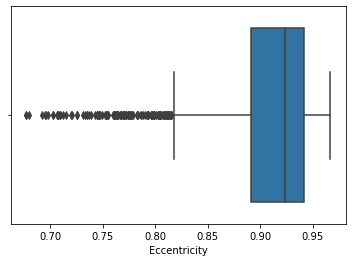

In [40]:
sns.boxplot(data["Eccentricity"])

In [41]:
data["Eccentricity"]=np.where(data["Eccentricity"]<0.83,0.83,data["Eccentricity"])

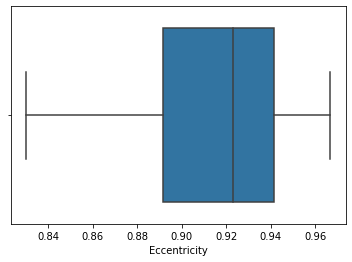

In [42]:
sns.boxplot(data["Eccentricity"])

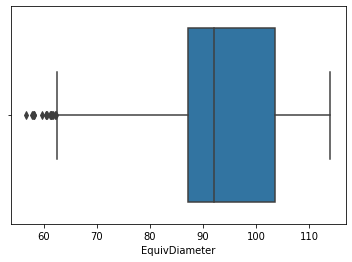

In [55]:
sns.boxplot(data["EquivDiameter"])

In [56]:
data["EquivDiameter"]=np.where(data["EquivDiameter"]<65,65,data["EquivDiameter"])

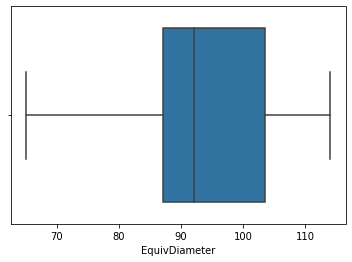

In [57]:
sns.boxplot(data["EquivDiameter"])

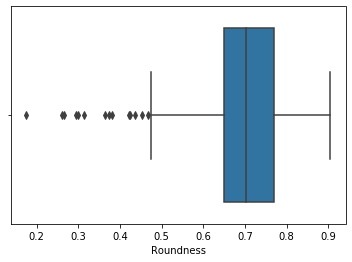

In [58]:
sns.boxplot(data["Roundness"])

In [59]:
data["Roundness"]=np.where(data["Roundness"]<0.5,0.5,data["Roundness"])

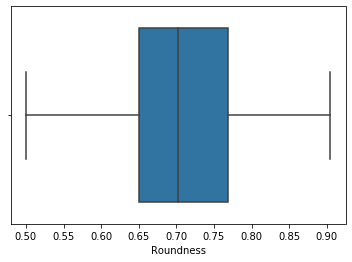

In [60]:
sns.boxplot(data["Roundness"])

In [61]:
data.head()

,id,Area,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Roundness,AspectRation,Class
0,1,4537,64.012769,0.83,4677,76.004525,0.764510,1.440796,1
1,2,2872,51.400454,0.83,3015,65.000000,0.831658,1.453137,1
2,3,3048,52.043491,0.83,3132,65.000000,0.868434,1.465950,1
3,4,3073,51.928487,0.83,3157,65.000000,0.870203,1.483456,1
4,5,3693,56.374021,0.83,3802,68.571668,0.874743,1.510000,1


In [74]:
data.tail()

,id,Area,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Roundness,AspectRation,Class
18180,18181,5853,51.029281,0.939210,6008,86.326537,0.663444,2.912535,0
18181,18182,7585,58.141659,0.939398,7806,98.272692,0.641362,2.916910,0
18182,18183,6365,52.908085,0.939760,6531,90.023162,0.682832,2.925396,0
18183,18184,5960,51.474600,0.940427,6189,87.112041,0.635227,2.941216,0
18184,18185,6134,51.590606,0.941500,6283,88.374495,0.672274,2.967245,0


In [62]:
X=data.drop(columns=["Class","id"])
y=data["Class"]

In [63]:
X.shape

(18185, 7)

In [64]:
y.shape

(18185,)

In [65]:
sc=StandardScaler()

In [66]:
x_scaled=sc.fit_transform(X)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=256)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dc=DecisionTreeClassifier()

In [79]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [80]:
dc.score(x_test,y_test)

0.9833211143695014

In [84]:
dc.predict(sc.transform([[6134,51.59,0.94,6283,88.37,0.67,2.96]]))

array([0], dtype=int64)

In [85]:
dc.predict(sc.transform([[4537,64.01,0.83,4677,76,0.76,1.44]]))

array([1], dtype=int64)

In [87]:
dc.predict(sc.transform([[6365,52.90,0.93,6531,90.02,0.68,2.92]]))

array([0], dtype=int64)